# 택시요금 데이터 다루기

## Step1

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.rcParams['font.family'] = 'AppleGothic'

df = pd.read_csv("trip.csv")

In [57]:
df.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


In [58]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22698.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.024009,1.835745,0.312514
std,1.304942,3.653023,13.240074,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


승객수가 과도하게 많은 값, 거리도 너무 긴 값, 요금은 음수랑, 과도하게 높은 값, 팁도 과도하게 높은 값, 톨비도 과도하게 높은 값

승객 이름은 필요가 없다

In [59]:
df.drop(['passenger_name'], axis=1, inplace=True)

### 결측치 확인

In [60]:
df.isna().sum()

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              3
tip_amount               0
tolls_amount             0
dtype: int64

In [61]:
df[df["fare_amount"].isna()]

,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
52,04/04/2017 4:22:03 PM,04/04/2017 4:35:30 PM,Cash,1,2.20,NaN,0.0,0.00
189,08/21/2017 12:40:25 PM,08/21/2017 1:12:31 PM,Debit Card,3,15.20,NaN,5.0,0.00
244,08/09/2017 8:32:09 AM,08/09/2017 9:31:11 AM,Cash,1,15.89,NaN,10.0,5.76


요금 누락이라고 판단하고 그냥 삭제

In [62]:
df = df.dropna(subset=['fare_amount'])

In [63]:
df.isna().sum()

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              0
tip_amount               0
tolls_amount             0
dtype: int64

### 이상치 확인

"passenger_count", "trip_distance", "fare_amount", "tip_amount", "tolls_amount"에 대한 이상치를 확인

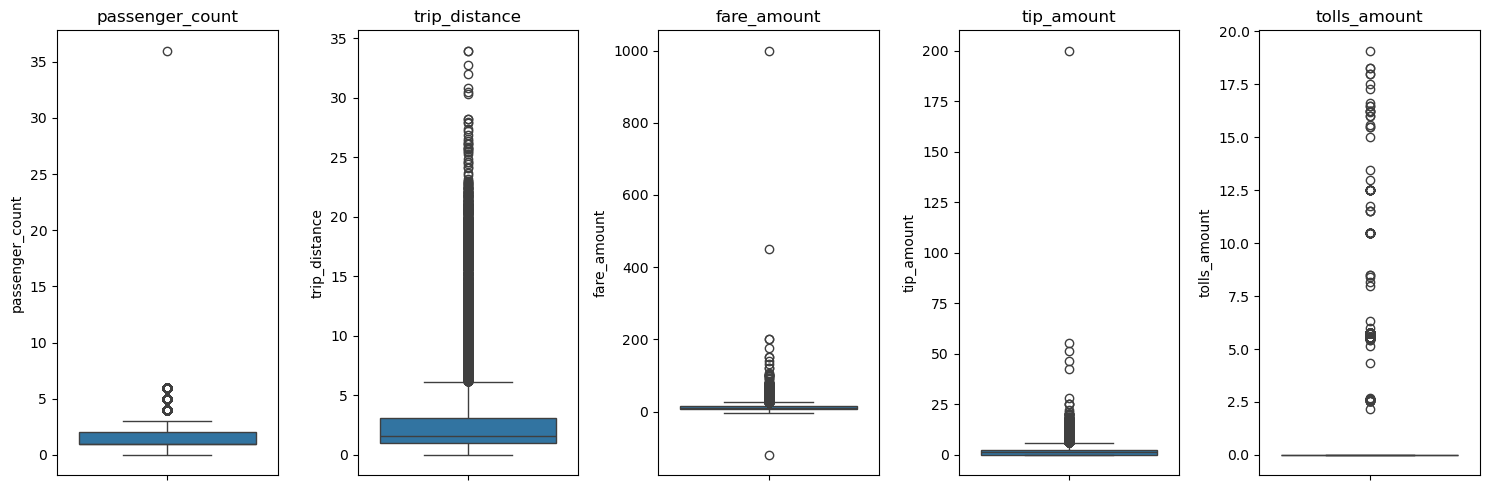

In [64]:
# boxplot을 그려서 확인
cols = ["passenger_count", "trip_distance",
        "fare_amount", "tip_amount", "tolls_amount"]

plt.figure(figsize=(15,5))

for i, col in enumerate(cols):
    plt.subplot(1, 5, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [66]:
df["passenger_count"].value_counts().sort_index()

passenger_count
0        33
1     16117
2      3305
3       952
4       455
5      1143
6       692
36        1
Name: count, dtype: int64

36이라는 값만 제거

In [67]:
df = df[df["passenger_count"] != 36]


In [81]:
(df["passenger_count"] == 0).sum()

np.int64(33)

승객수가 0인데 운행? -> 제거

In [82]:
df = df[df["passenger_count"] > 0]

In [83]:
(df["passenger_count"] == 0).sum()
df["passenger_count"].value_counts().sort_index()

passenger_count
1    16100
2     3301
3      952
4      455
5     1142
6      691
Name: count, dtype: int64

In [84]:
df["trip_distance"].describe()

count    22641.000000
mean         2.912963
std          3.646080
min          0.000000
25%          1.000000
50%          1.610000
75%          3.070000
max         33.960000
Name: trip_distance, dtype: float64

In [85]:
(df["trip_distance"] == 0).sum()

np.int64(142)

In [86]:
df = df[df["trip_distance"] > 0]

In [87]:
(df["trip_distance"] == 0).sum()
df["trip_distance"].describe()

count    22499.000000
mean         2.931348
std          3.650193
min          0.010000
25%          1.000000
50%          1.630000
75%          3.095000
max         33.960000
Name: trip_distance, dtype: float64

In [88]:
df.sort_values("fare_amount",ascending=False).head(5)

,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
3584,01/01/2017 11:53:01 PM,01/01/2017 11:53:42 PM,Credit Card,1,7.30,152.0,0.0,0.00
9282,06/18/2017 11:33:25 PM,06/19/2017 12:12:38 AM,Cash,2,33.96,150.0,0.0,0.00
16381,11/30/2017 10:41:11 AM,11/30/2017 11:31:45 AM,Cash,1,25.50,140.0,0.0,16.26
10293,09/11/2017 11:41:04 AM,09/11/2017 12:18:58 PM,Cash,1,31.95,131.0,0.0,0.00
1930,06/16/2017 6:30:08 PM,06/16/2017 7:18:50 PM,Debit Card,2,12.50,120.0,5.0,12.50


음수랑, 200이상 요금은 제거

In [89]:
df = df[df["fare_amount"] > 0]
df = df[df["fare_amount"] <= 200]

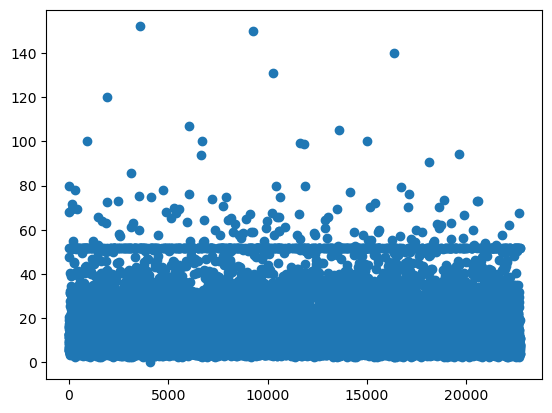

In [90]:
plt.scatter(df.index, df["fare_amount"])

In [91]:
df.sort_values("tip_amount", ascending=False).head(10)
df["tip_amount"].describe()

count    22499.000000
mean         1.819756
std          2.409131
min          0.000000
25%          0.000000
50%          1.360000
75%          2.450000
max         55.500000
Name: tip_amount, dtype: float64

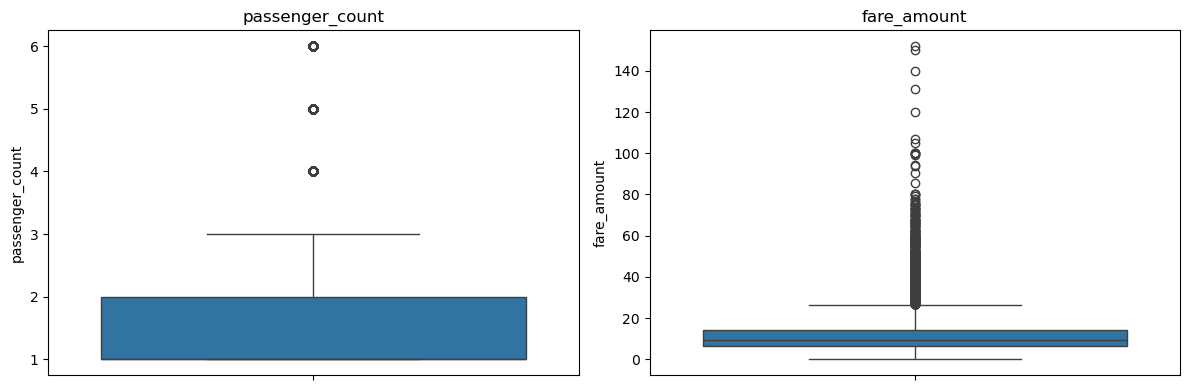

In [92]:
cols = ["passenger_count", "fare_amount"]

plt.figure(figsize=(12,4))

for i, col in enumerate(cols):
    plt.subplot(1, 2, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

### 시간 데이터 변환

In [93]:
# datetime 으로 변경
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])
df["tpep_dropoff_datetime"] = pd.to_datetime(df["tpep_dropoff_datetime"])

In [96]:
df['trip_time'] = df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]

In [97]:
df['trip_time_min'] = df["trip_time"].dt.total_seconds() / 60

In [98]:
df['trip_time_min'].describe()

count    22499.000000
mean        17.062525
std         61.569094
min        -16.983333
25%          6.733333
50%         11.233333
75%         18.450000
max       1439.550000
Name: trip_time_min, dtype: float64

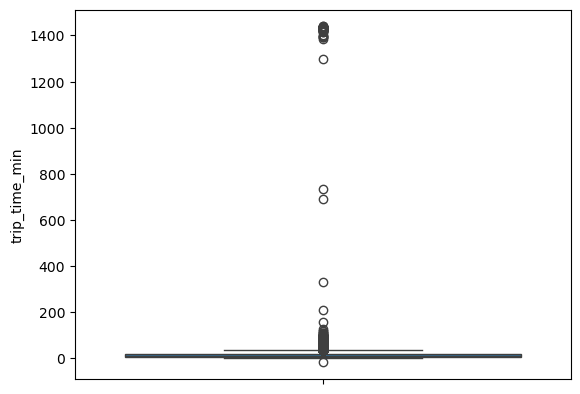

In [99]:
sns.boxplot(y=df["trip_time_min"])
plt.show()

운행시간이 양수 그리고 200분 미만으로 데이터 정제

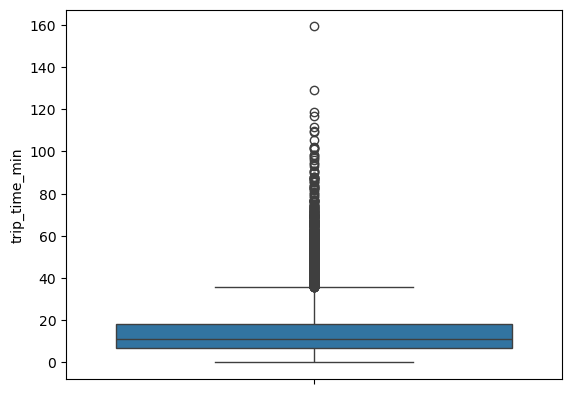

In [100]:
df = df[(df["trip_time_min"] > 0) & (df["trip_time_min"] <= 200)]
df["trip_time_min"].describe()

# 이상치 제거 후 
sns.boxplot(y=df["trip_time_min"])
plt.show()

### 텍스트 변환

In [101]:
df["payment_method"].value_counts()

payment_method
Cash           11074
Debit Card      5719
Credit Card     5660
Name: count, dtype: int64

In [116]:
df["payment_method"] = df["payment_method"].replace(
    ["Credit Card", "Debit Card"], "Card"
)

In [117]:
df["payment_method"].value_counts()

payment_method
Card    11379
Cash    11074
Name: count, dtype: int64

## Step 2

### 거리와 요금의 상관관계

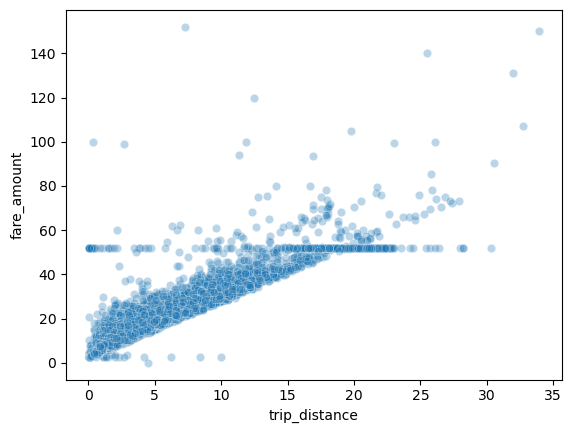

In [106]:
sns.scatterplot(
    x="trip_distance",
    y="fare_amount",
    data=df,
    alpha=0.3
)
plt.show()

### 시간과 요금의 상관관계

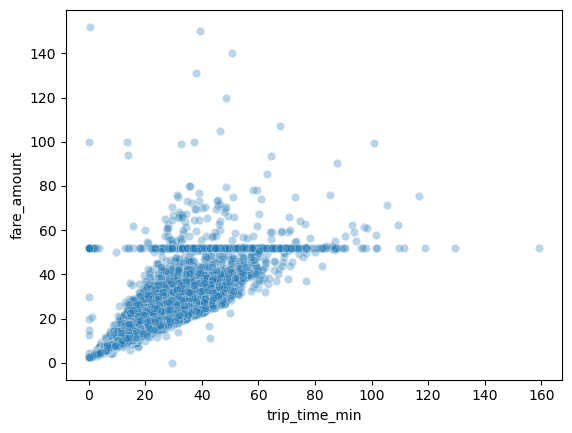

In [107]:
sns.scatterplot(
    x="trip_time_min",
    y="fare_amount",
    data=df,
    alpha=0.3
)
plt.show()

### 현금과 카드에 따른 팁 차이?

In [111]:
df[df["payment_method"] == "Cash"]["tip_amount"].value_counts().head()

tip_amount
0.0    3821
1.0     741
2.0     366
1.5     156
3.0     120
Name: count, dtype: int64

In [112]:
df[df["payment_method"] == "Card"]["tip_amount"].value_counts().head()

tip_amount
0.0    4084
1.0     707
2.0     388
1.5     145
3.0     116
Name: count, dtype: int64

없는 것 같다.

### 낮과 밤에 따른 요금 차이?

In [114]:
df=df.copy()

In [118]:
df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour
df["pickup_hour"]

0         8
1        14
2         7
3        13
4        23
         ..
22696    17
22697    16
22698    14
22699    12
22700    13
Name: pickup_hour, Length: 22453, dtype: int32

In [120]:
# 낮과 밤으로 구분
df["day_night"] = df["pickup_hour"].apply(
    lambda x: "Night" if (x >= 22 or x <= 4) else "Day"
)

In [ ]:
# 평균 요금 비교
df.groupby("day_night")["fare_amount"].mean()

day_night
Day      12.888899
Night    13.001779
Name: fare_amount, dtype: float64

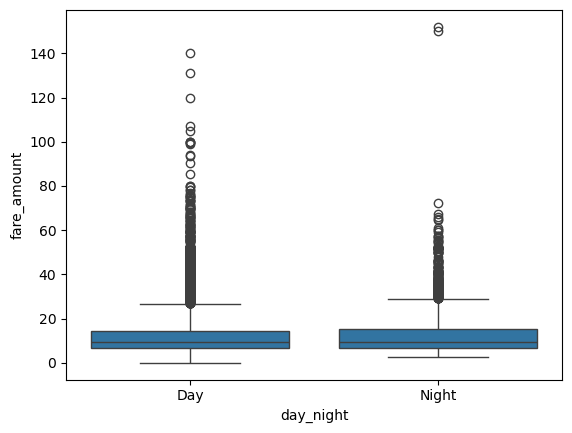

In [122]:
sns.boxplot(x="day_night", y="fare_amount", data=df)
plt.show()

비슷하다

### 분당 요금?

In [126]:
(df["trip_time_min"] == 0).sum()

np.int64(0)

In [133]:
df["trip_time_min_round"] = df["trip_time_min"].round()
df.loc[df["trip_time_min_round"] < 1, "trip_time_min_round"] = 1

In [134]:
df["fare_per_min"] = df["fare_amount"] / df["trip_time_min_round"]

In [135]:
df["fare_per_min"].describe()

count    22453.000000
mean         1.029638
std          1.868079
min          0.000345
25%          0.769231
50%          0.892857
75%          1.083333
max        152.000000
Name: fare_per_min, dtype: float64

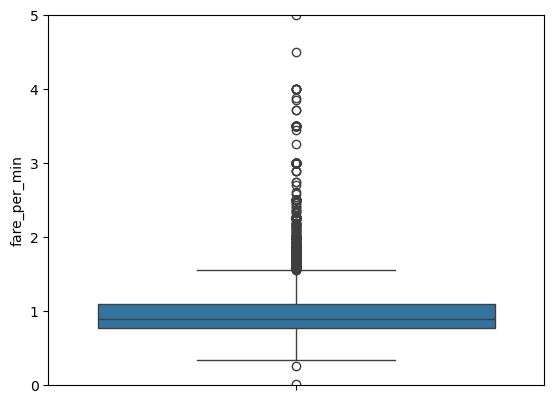

In [136]:
plt.ylim(0, 5)
sns.boxplot(y=df["fare_per_min"])
plt.show()

In [137]:
df["fare_per_min"].median()

0.8928571428571429

### 상관관계 히트맵?

In [138]:
numeric_cols = [
    "passenger_count",
    "trip_distance",
    "trip_time_min",
    "fare_amount",
    "tip_amount",
    "tolls_amount",
    "fare_per_min"
]

corr = df[numeric_cols].corr()

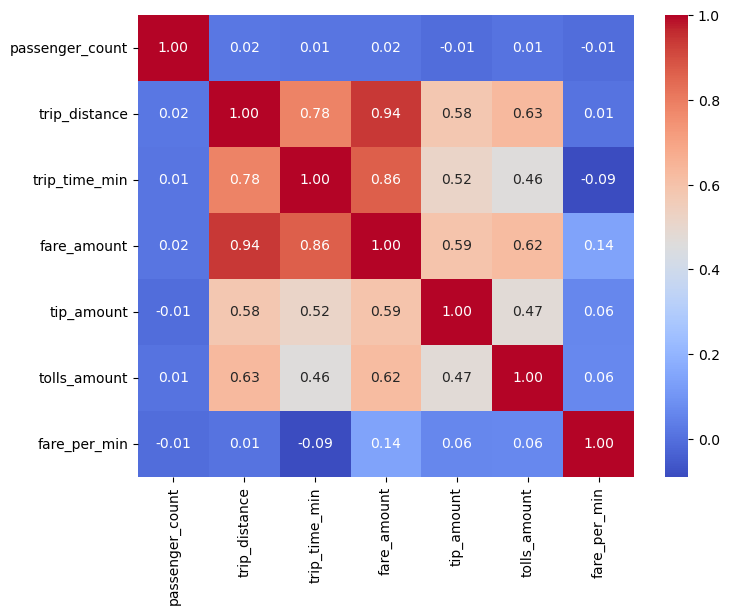

In [139]:
plt.figure(figsize=(8,6))
sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.show()

### 최종 데이터 정제

In [141]:
df.columns

Index(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'payment_method',
       'passenger_count', 'trip_distance', 'fare_amount', 'tip_amount',
       'tolls_amount', 'trip_time', 'trip_time_min', 'pickup_hour',
       'day_night', 'fare_per_min', 'trip_time_min_round'],
      dtype='object')

In [142]:
df = df.drop(columns=[
    "tpep_pickup_datetime",
    "tpep_dropoff_datetime",
    "trip_time",
    "pickup_hour",
    "day_night",
    "trip_time_min_round",
    "fare_per_min"
])

In [143]:
df.columns

Index(['payment_method', 'passenger_count', 'trip_distance', 'fare_amount',
       'tip_amount', 'tolls_amount', 'trip_time_min'],
      dtype='object')

In [145]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 22453 entries, 0 to 22700
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   payment_method   22453 non-null  object 
 1   passenger_count  22453 non-null  int64  
 2   trip_distance    22453 non-null  float64
 3   fare_amount      22453 non-null  float64
 4   tip_amount       22453 non-null  float64
 5   tolls_amount     22453 non-null  float64
 6   trip_time_min    22453 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 1.4+ MB


,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,trip_time_min
count,22453.000000,22453.000000,22453.000000,22453.000000,22453.000000,22453.000000
mean,1.645214,2.928220,12.910663,1.819572,0.308403,14.413039
std,1.284662,3.644193,10.738278,2.405511,1.382887,11.572368
min,1.000000,0.010000,0.010000,0.000000,0.000000,0.016667
25%,1.000000,1.000000,6.500000,0.000000,0.000000,6.716667
50%,1.000000,1.630000,9.500000,1.360000,0.000000,11.233333
75%,2.000000,3.090000,14.500000,2.450000,0.000000,18.383333
max,6.000000,33.960000,152.000000,55.500000,19.100000,159.316667


In [146]:
df.head()

,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,trip_time_min
0,Card,6,3.34,13.0,2.76,0.0,14.066667
1,Card,1,1.80,16.0,4.00,0.0,26.500000
2,Card,1,1.00,6.5,1.45,0.0,7.200000
3,Cash,1,3.70,20.5,6.39,0.0,30.250000
4,Card,1,4.37,16.5,0.00,0.0,16.716667


## Step3

### 선형회귀

높은 상관관계인 거리와 시간에 따른 요금을 예측하는 선형 회귀 모델 구성

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = df[["trip_distance", "trip_time_min"]]
y = df["fare_amount"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R²:", r2_score(y_test, y_pred))
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

R²: 0.9330904625991829
Intercept: 2.6268113346840156
Coefficients: [1.99153486 0.30913099]


R스퀘어 0.93으로 높은 설명력
요금은 거리에 많은 영향을 받는 선형구조

In [ ]:
# fare = 2.63 + 1.99 × distance + 0.31 × time

### 팁과 톨비도 상관관계가 높음

In [149]:
# 요금과 팁의 비율 계산
df["tip_ratio"] = df["tip_amount"] / df["fare_amount"]
df["tip_ratio"].describe()

count    22453.000000
mean         0.143754
std          0.128446
min          0.000000
25%          0.000000
50%          0.186047
75%          0.229111
max          4.000000
Name: tip_ratio, dtype: float64

팁은 요금 계산 후 주니깐 톨비만 넣어서 회귀 모델

In [150]:
X = df[["trip_distance", "trip_time_min", "tolls_amount"]]
y = df["fare_amount"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model2 = LinearRegression()
model2.fit(X_train, y_train)

y_pred2 = model2.predict(X_test)

print("R²:", r2_score(y_test, y_pred2))
print("Intercept:", model2.intercept_)
print("Coefficients:", model2.coef_)

R²: 0.9363913549168219
Intercept: 2.799030540005086
Coefficients: [1.85057485 0.31448475 0.52565303]


설명력 차이가 비슷해서 추가 X

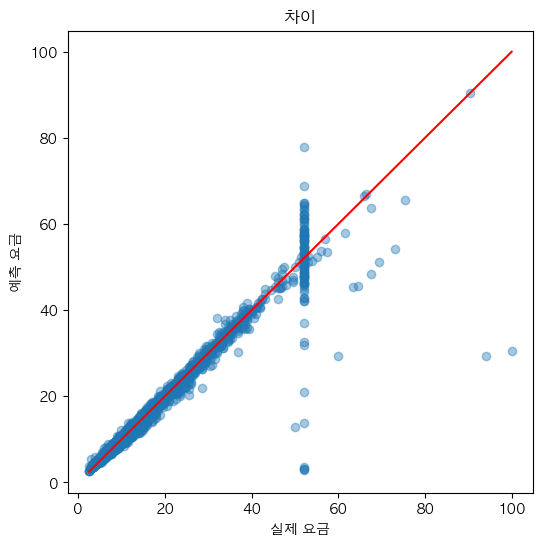

In [154]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red')
plt.xlabel("실제 요금")
plt.ylabel("예측 요금")
plt.title("차이")
plt.show()